# problem definition:
Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. There has been increased escalations on service delivery and client satisfaction levels came down by 8 percentage points.

# this project , which analyses the current employee data and find the core underlying causes of this performance issues.
The following insights are expected from this project.
1 Department wise performances
2 Top 3 Important Factors effecting employee performance
3 A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
4 Recommendations to improve the employee performance based on insights from analysis

# following approach will be followed in this project
* problem definition
* Data
* Evalution
* Features
* Modelling
* Experimentation

In [2]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## modelling libraries from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
## evaluation metrics imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
# warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.multioutput import MultiOutputClassifier

In [3]:
df=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
df["EmpDepartment"].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

## about data

In [5]:
df.shape

(1200, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
df.corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


In [8]:
len(df)

1200

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [10]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

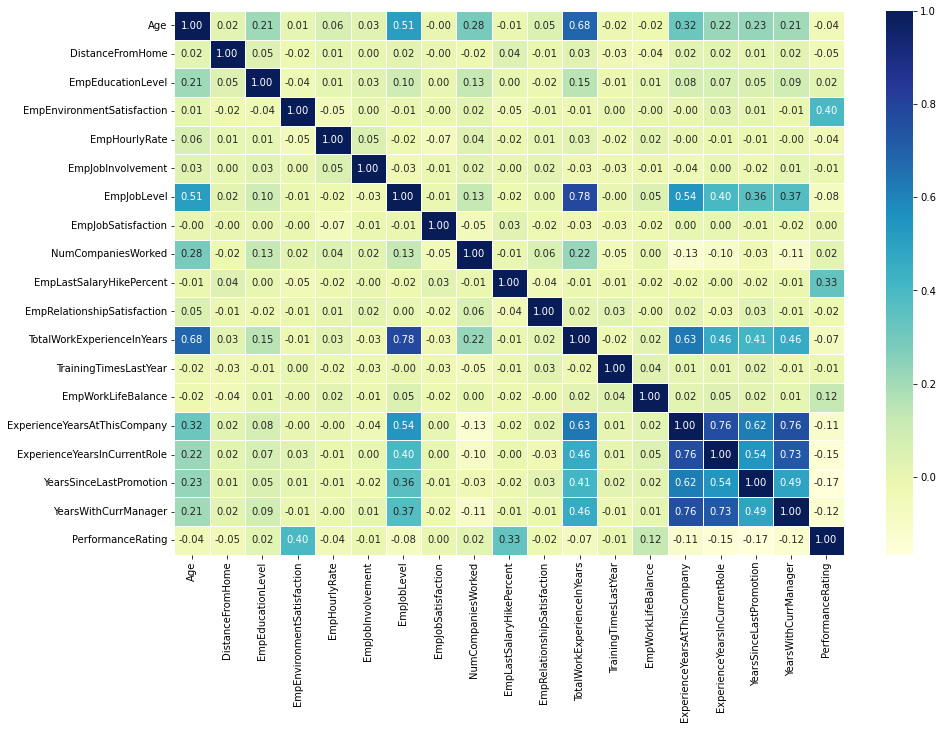

In [11]:
# making a correlation matrix
corr_matrix =df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax =sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");

In [12]:
df.isna().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

<AxesSubplot:title={'center':'correlation with performancerating'}>

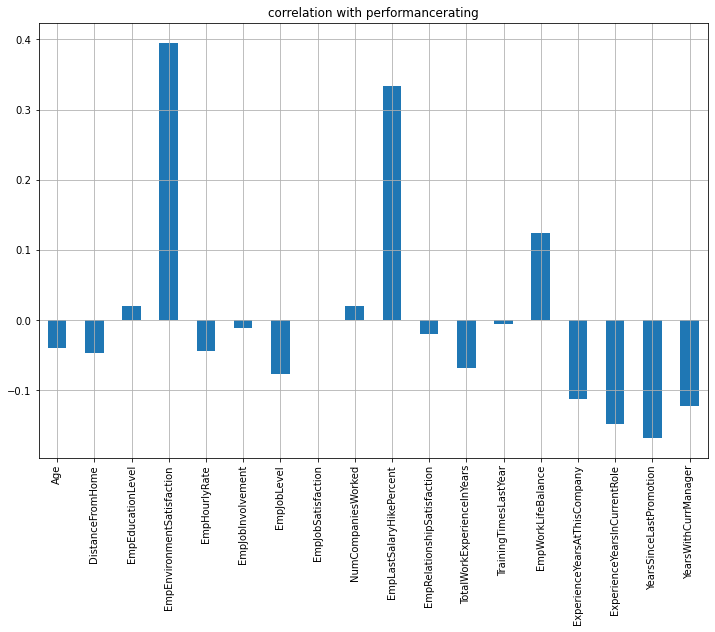

In [13]:
df.drop("PerformanceRating", axis=1).corrwith(df.PerformanceRating).plot(kind="bar", grid=True, figsize=(12,8),
                                                                                     title="correlation with performancerating")

* observation: there are many columns which are not correlated with target variable

## checking with department 

In [14]:
dept = df.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [15]:
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

## turning categories into numbers

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    df.iloc[:,i] = enc.fit_transform(df.iloc[:,i])
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [18]:
df.drop(["EmpNumber"],axis=1,inplace=True)
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0,4,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0,0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,20,8,3,8,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,7,7,0,3


## visualization

## checking for value counts

In [19]:
df["MaritalStatus"].value_counts()

1    548
2    384
0    268
Name: MaritalStatus, dtype: int64

In [20]:
df["Gender"].value_counts()

1    725
0    475
Name: Gender, dtype: int64

In [21]:
df["EmpDepartment"].value_counts()

5    373
1    361
4    343
3     54
2     49
0     20
Name: EmpDepartment, dtype: int64

In [22]:
df["Attrition"].value_counts()

0    1022
1     178
Name: Attrition, dtype: int64

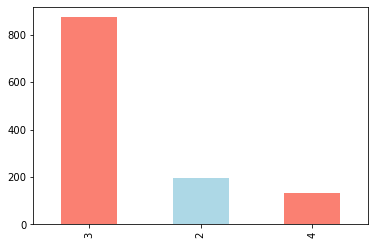

In [23]:
df["PerformanceRating"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

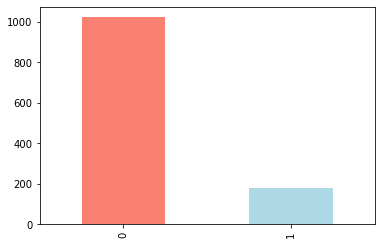

In [24]:
df["Attrition"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

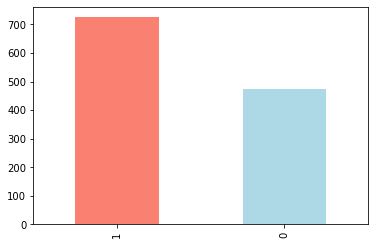

In [25]:
df["Gender"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

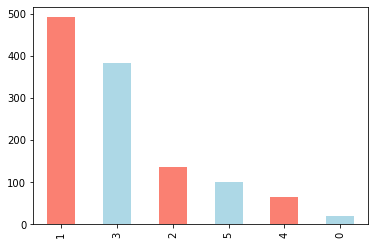

In [26]:
df["EducationBackground"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

## observation: as dataset is imbalanced, it is necessary to balance dataset to get correct accuracy and avoid model to perform bias performing modelling

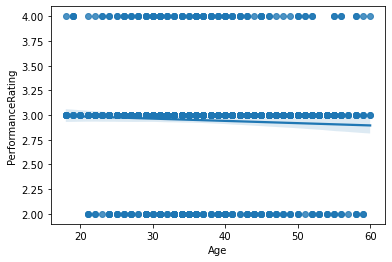

In [27]:
sns.regplot(x="Age",y="PerformanceRating", data=df);

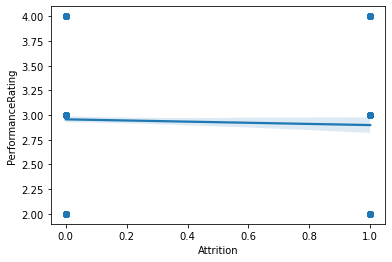

In [28]:
sns.regplot(x="Attrition",y="PerformanceRating", data=df);

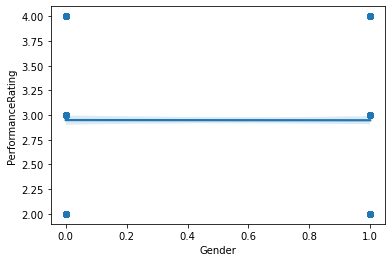

In [29]:
sns.regplot(x="Gender", y="PerformanceRating", data=df);

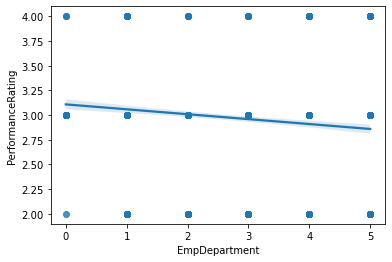

In [30]:
sns.regplot(x="EmpDepartment",y="PerformanceRating", data=df);

## value counts of empdepartment

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

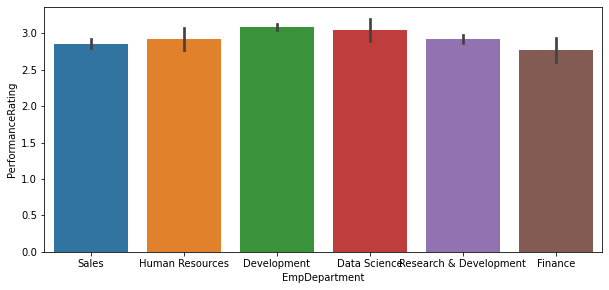

In [31]:
plt.figure(figsize=(10,4.5))
sns.barplot(dept_per['EmpDepartment'],dept_per['PerformanceRating'])

In [32]:
df["EmpDepartment"].value_counts()

5    373
1    361
4    343
3     54
2     49
0     20
Name: EmpDepartment, dtype: int64

In [33]:
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

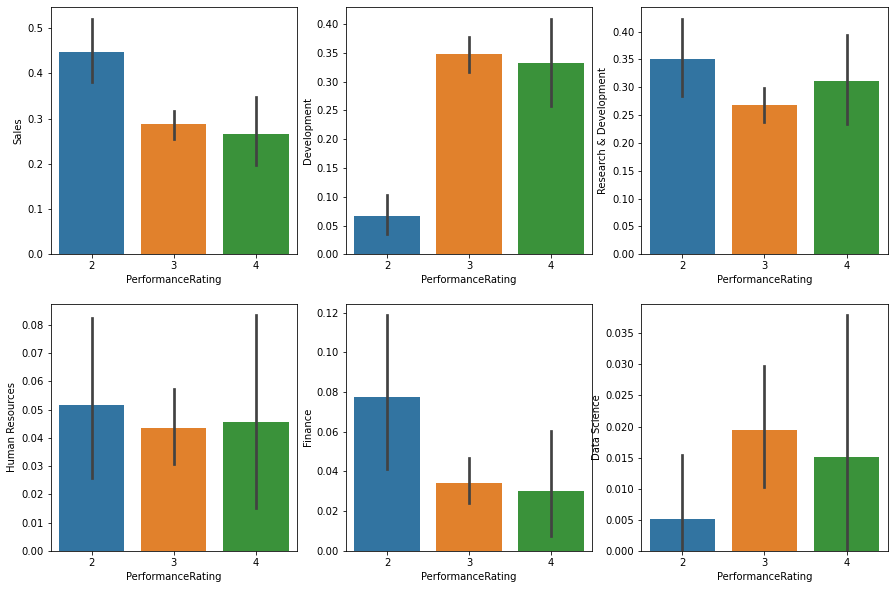

In [34]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Data Science'])
plt.show()

## observation: plotted department wise to know which department has high performancerating
* sales: good is high as performance rating and least is outstanding
* Developmet:  excellent is high and good is least
* research: good is high and excellent is least
* human resources: good is high and excellent is least
* finance: good is high and outstanding is least
* datascience: excellen is high and good is least

In [35]:
categorical_val=[]
continous_val=[]
for column in df.columns:
    if len(df[column].unique())<=10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

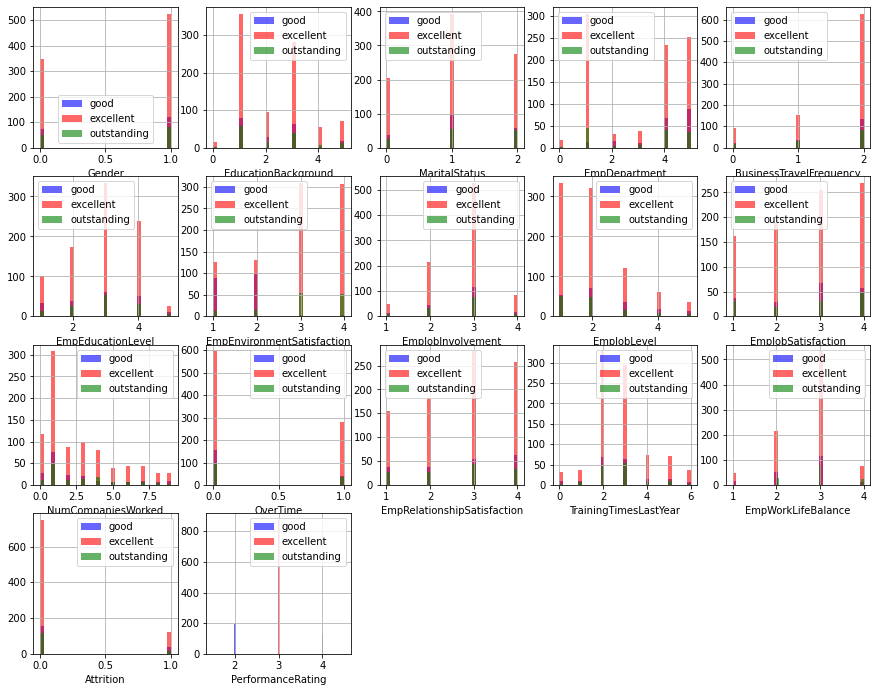

In [36]:
plt.figure(figsize=(15,15))
for i, column in enumerate(categorical_val,1):
    plt.subplot(5,5,i)
    df[df["PerformanceRating"]==2][column].hist(bins=35,color="blue", label="good", alpha=0.6)
    df[df["PerformanceRating"]==3][column].hist(bins=35, color="red", label="excellent", alpha=0.6)
    df[df["PerformanceRating"]==4][column].hist(bins=35,color="green",label="outstanding",alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## plotted each independent variable against dependent variable 

In [37]:
pd.crosstab(df.PerformanceRating,df.Gender)

Gender,0,1
PerformanceRating,,
2,75,119
3,349,525
4,51,81


In [38]:
pd.crosstab(df.PerformanceRating,df.Attrition)

Attrition,0,1
PerformanceRating,,
2,158,36
3,750,124
4,114,18


In [39]:
pd.crosstab(df.PerformanceRating,df.EmpDepartment)

EmpDepartment,0,1,2,3,4,5
PerformanceRating,,,,,,
2,1,13,15,10,68,87
3,17,304,30,38,234,251
4,2,44,4,6,41,35


## crosstab showing performancerating on basis of department wise
* 2 refers to good
* 3 refoers to excellent
* 4 refers to outstanding

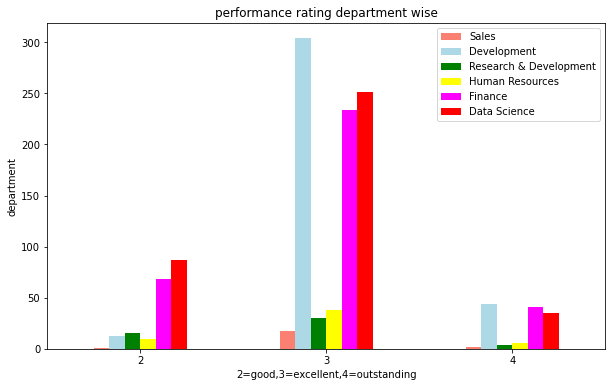

In [40]:
# create a plot of crosstab
pd.crosstab(df.PerformanceRating,df.EmpDepartment).plot(kind="bar",
                                                        figsize=(10,6),
                                                        color=["salmon","lightblue","green","yellow","magenta","red"])
plt.title("performance rating department wise")
plt.xlabel("2=good,3=excellent,4=outstanding")
plt.ylabel("department")
plt.legend(["Sales","Development","Research & Development","Human Resources","Finance","Data Science"])
plt.xticks(rotation=0);

## good prformance rating for department of "data science" and least is for "sales"
## excellent performance rating if for department of "development" and least is for "sales"
## outstanding performance rating is for department "development" and least is for "sales"

## age vs performancerating

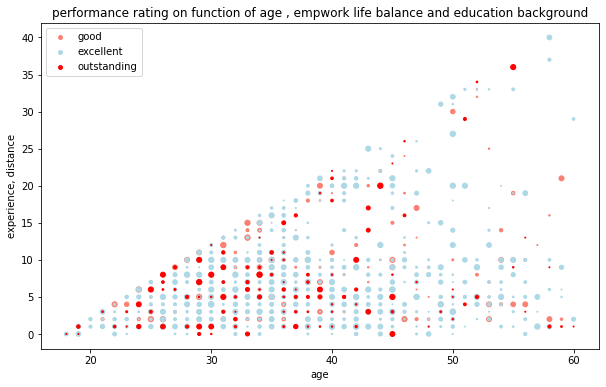

In [41]:
# another figure plotting age and heart disease
plt.figure(figsize=(10,6))
# scatter with positive target
plt.scatter(df.Age[df.PerformanceRating==2],
           df.ExperienceYearsAtThisCompany[df.PerformanceRating==2],
           df.DistanceFromHome[df.PerformanceRating==2],
           c="salmon");
# scatter with negetive target
plt.scatter(df.Age[df.PerformanceRating==3],
            df.ExperienceYearsAtThisCompany[df.PerformanceRating==3],
            df.DistanceFromHome[df.PerformanceRating==3],
            c="lightblue");
plt.scatter(df.Age[df.PerformanceRating==4],
            df.ExperienceYearsAtThisCompany[df.PerformanceRating==4],
            df.DistanceFromHome[df.PerformanceRating==4],
            c="red");
# add some information
plt.title("performance rating on function of age , empwork life balance and education background")
plt.xlabel("age")
plt.ylabel("experience, distance")
plt.legend(["good","excellent","outstanding"]);

## plot of perforamncerating against experienceyears at this company and distance from home and age. the performance rating is outstanding against these two variables of dataset

* splitting of x and dependent variables

In [42]:
x=df.drop("PerformanceRating",axis=1)
y=df["PerformanceRating"]

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [44]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0,4,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0,0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,20,8,3,8,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,7,7,0,3


In [45]:
!pip install imblearn

## SMOTE to oversampling data

In [46]:
from imblearn.over_sampling import SMOTE
oversampling=SMOTE()

In [47]:
x_train_over, y_train_over=oversampling.fit_resample(x_train.astype("float"), y_train)
x_train_over

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30.000000,0.000000,3.000000,2.000000,4.000000,10.000000,0.000000,9.000000,2.000000,3.000000,...,18.000000,3.000000,10.000000,3.000000,3.000000,8.000000,4.000000,1.000000,7.000000,0.0
1,33.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,14.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000,0.000000,2.000000,0.0
2,44.000000,0.000000,3.000000,0.000000,2.000000,4.000000,2.000000,7.000000,3.000000,2.000000,...,14.000000,4.000000,23.000000,4.000000,2.000000,22.000000,7.000000,1.000000,10.000000,0.0
3,30.000000,1.000000,2.000000,1.000000,5.000000,13.000000,2.000000,10.000000,3.000000,3.000000,...,18.000000,1.000000,10.000000,3.000000,3.000000,10.000000,3.000000,1.000000,4.000000,0.0
4,53.000000,0.000000,3.000000,0.000000,4.000000,9.000000,2.000000,7.000000,2.000000,4.000000,...,18.000000,2.000000,26.000000,6.000000,3.000000,7.000000,7.000000,4.000000,7.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,28.071834,1.000000,3.000000,0.828733,2.756900,6.513800,1.171267,16.027599,2.585633,1.828733,...,20.828733,2.171267,2.243100,0.000000,2.414367,1.828733,1.414367,0.414367,0.828733,1.0
2114,38.774114,1.000000,1.774114,0.000000,4.000000,10.161171,2.000000,6.290601,2.387057,2.387057,...,17.064715,3.612943,9.225886,1.161171,4.000000,4.225886,1.612943,0.387057,2.612943,0.0
2115,35.675122,0.963902,1.072195,1.927805,5.000000,13.963902,1.963902,2.036098,3.891707,3.036098,...,20.963902,3.927805,6.963902,3.000000,2.036098,3.108293,2.108293,0.963902,2.072195,0.0
2116,51.047142,0.869107,3.000000,0.130893,1.392678,14.214643,2.000000,1.000000,2.130893,4.000000,...,21.869107,3.000000,32.000000,1.261786,2.130893,5.523571,4.523571,1.000000,3.261786,0.0


In [48]:
pd.DataFrame(x_train_over)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30.000000,0.000000,3.000000,2.000000,4.000000,10.000000,0.000000,9.000000,2.000000,3.000000,...,18.000000,3.000000,10.000000,3.000000,3.000000,8.000000,4.000000,1.000000,7.000000,0.0
1,33.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,14.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000,0.000000,2.000000,0.0
2,44.000000,0.000000,3.000000,0.000000,2.000000,4.000000,2.000000,7.000000,3.000000,2.000000,...,14.000000,4.000000,23.000000,4.000000,2.000000,22.000000,7.000000,1.000000,10.000000,0.0
3,30.000000,1.000000,2.000000,1.000000,5.000000,13.000000,2.000000,10.000000,3.000000,3.000000,...,18.000000,1.000000,10.000000,3.000000,3.000000,10.000000,3.000000,1.000000,4.000000,0.0
4,53.000000,0.000000,3.000000,0.000000,4.000000,9.000000,2.000000,7.000000,2.000000,4.000000,...,18.000000,2.000000,26.000000,6.000000,3.000000,7.000000,7.000000,4.000000,7.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,28.071834,1.000000,3.000000,0.828733,2.756900,6.513800,1.171267,16.027599,2.585633,1.828733,...,20.828733,2.171267,2.243100,0.000000,2.414367,1.828733,1.414367,0.414367,0.828733,1.0
2114,38.774114,1.000000,1.774114,0.000000,4.000000,10.161171,2.000000,6.290601,2.387057,2.387057,...,17.064715,3.612943,9.225886,1.161171,4.000000,4.225886,1.612943,0.387057,2.612943,0.0
2115,35.675122,0.963902,1.072195,1.927805,5.000000,13.963902,1.963902,2.036098,3.891707,3.036098,...,20.963902,3.927805,6.963902,3.000000,2.036098,3.108293,2.108293,0.963902,2.072195,0.0
2116,51.047142,0.869107,3.000000,0.130893,1.392678,14.214643,2.000000,1.000000,2.130893,4.000000,...,21.869107,3.000000,32.000000,1.261786,2.130893,5.523571,4.523571,1.000000,3.261786,0.0


In [49]:
df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [50]:
import warnings
warnings.filterwarnings('ignore')

## spread of data

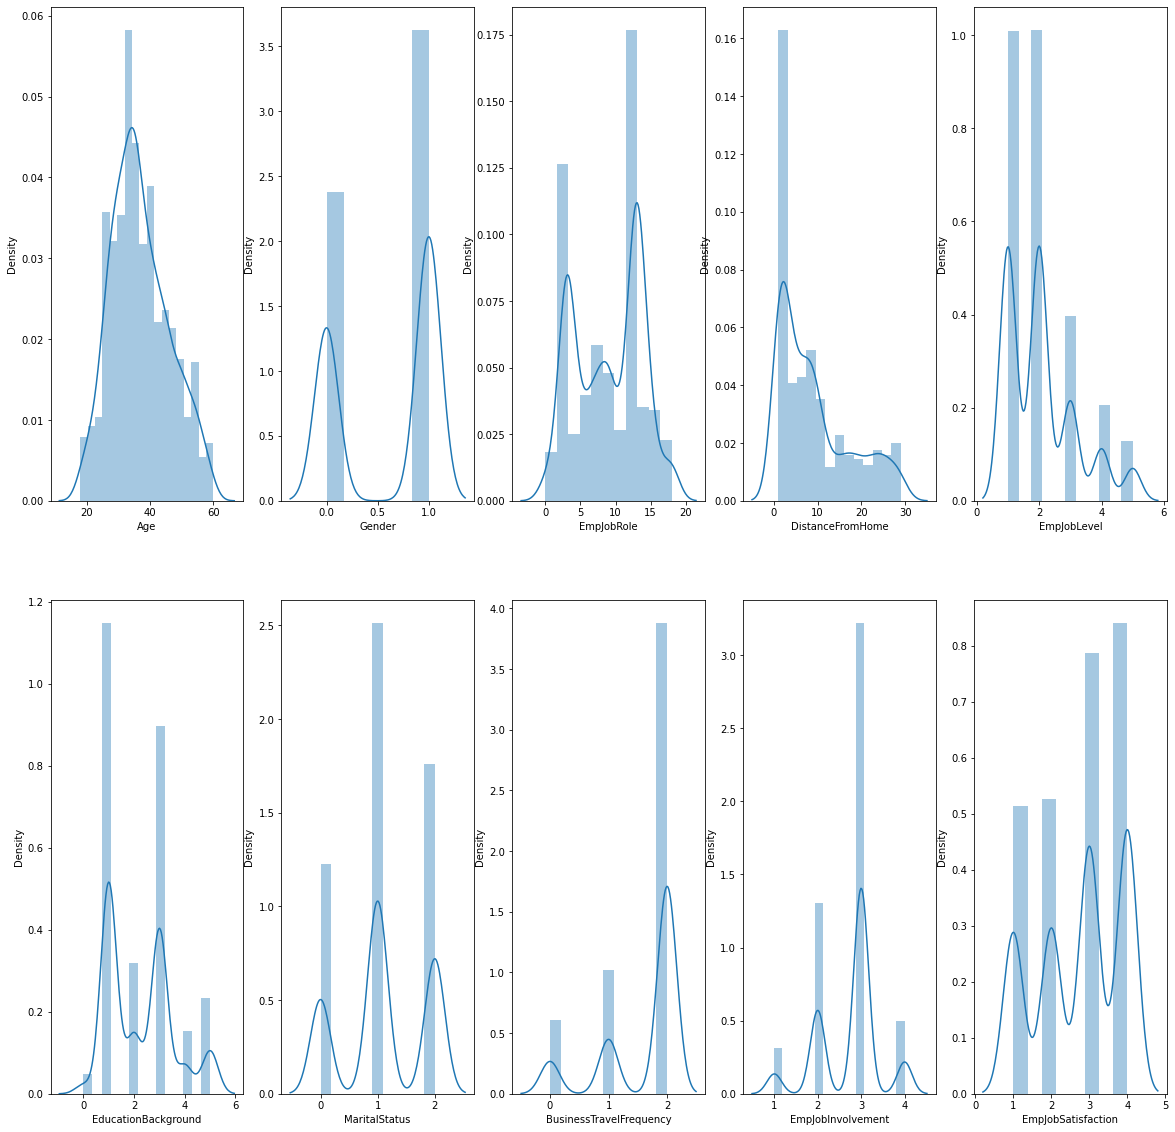

In [51]:
figure,ax=plt.subplots(2,5 ,figsize=(20,20))
sns.distplot(df["Age"],ax=ax[0,0])
sns.distplot(df["Gender"],ax=ax[0,1])
sns.distplot(df["EducationBackground"],ax=ax[1,0])
sns.distplot(df["MaritalStatus"],ax=ax[1,1])
sns.distplot(df["EmpJobRole"],ax=ax[0,2])
sns.distplot(df["BusinessTravelFrequency"], ax=ax[1,2])
sns.distplot(df["DistanceFromHome"], ax=ax[0,3])
sns.distplot(df["EmpJobInvolvement"], ax=ax[1,3])
sns.distplot(df["EmpJobLevel"], ax=ax[0,4])
sns.distplot(df["EmpJobSatisfaction"],ax=ax[1,4]);

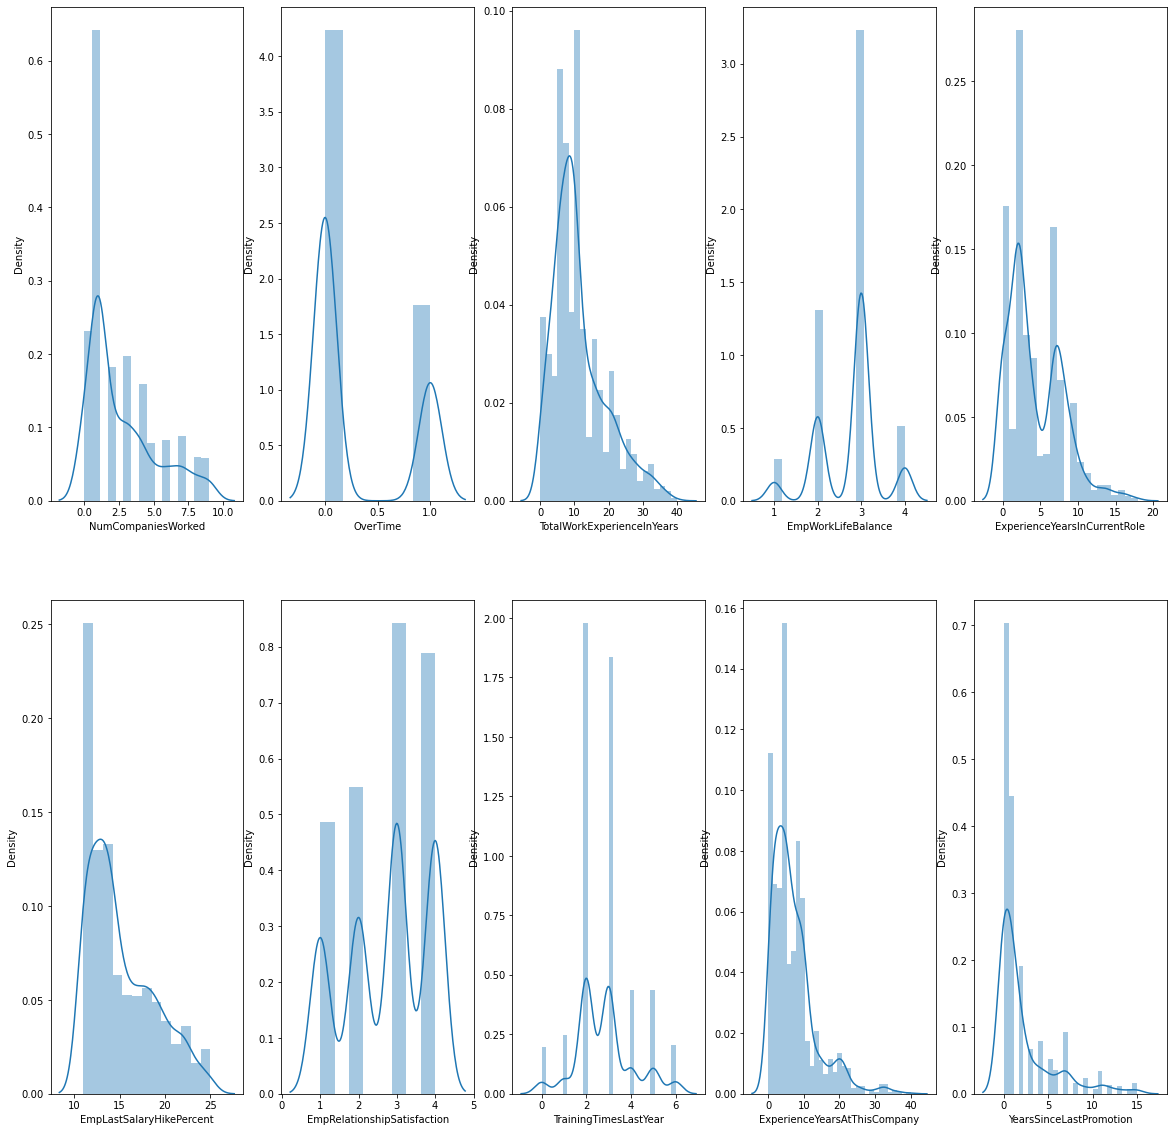

In [52]:
figure,ax=plt.subplots(2,5 ,figsize=(20,20))
sns.distplot(df["NumCompaniesWorked"],ax=ax[0,0])
sns.distplot(df["OverTime"],ax=ax[0,1])
sns.distplot(df["EmpLastSalaryHikePercent"],ax=ax[1,0])
sns.distplot(df["EmpRelationshipSatisfaction"],ax=ax[1,1])
sns.distplot(df["TotalWorkExperienceInYears"],ax=ax[0,2])
sns.distplot(df["TrainingTimesLastYear"], ax=ax[1,2])
sns.distplot(df["EmpWorkLifeBalance"], ax=ax[0,3])
sns.distplot(df["ExperienceYearsAtThisCompany"], ax=ax[1,3])
sns.distplot(df["ExperienceYearsInCurrentRole"], ax=ax[0,4])
sns.distplot(df["YearsSinceLastPromotion"],ax=ax[1,4]);

## performing standard scaling of data as data is not normally distributed and also before performing pca

## standard scaling for transforming data

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  #initialize standardscaler
X_std =  scaler.fit_transform(x)  #fit transform


transpose = X_std.T  #transpose
transpose_df = pd.DataFrame(data=transpose)   #transpose dataframe
cov_mat = np.cov(transpose)

cov_mat

array([[ 1.00083403e+00, -4.01405891e-02, -5.59513440e-02,
        -9.84498825e-02, -1.04473641e-04, -3.76965366e-02,
         4.06123984e-02,  2.09542114e-02,  2.07485515e-01,
         1.38257464e-02,  6.29190608e-02,  2.72391708e-02,
         5.09563808e-01, -2.43765049e-03,  2.84645662e-01,
         5.19529676e-02, -6.11024824e-03,  4.97905114e-02,
         6.81454256e-01, -1.60664958e-02, -1.95791742e-02,
         3.19117454e-01,  2.17343626e-01,  2.28389644e-01,
         2.05269278e-01, -1.89474921e-01],
       [-4.01405891e-02,  1.00083403e+00,  9.93076103e-03,
        -4.22044877e-02, -1.09344618e-02,  1.13415200e-02,
        -4.36447873e-02, -1.50848448e-03, -2.29794488e-02,
         3.25927329e-05,  2.21947933e-03,  1.09577788e-02,
        -5.07273974e-02,  2.47004274e-02, -3.67060480e-02,
        -3.84418363e-02, -5.32313978e-03,  3.07327358e-02,
        -6.11054907e-02, -5.77025448e-02,  1.58065518e-02,
        -3.04168712e-02, -3.18497110e-02, -2.15928848e-02,
        -3.66

In [54]:
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.000834,-0.040141,-0.055951,-0.098450,-0.000104,-0.037697,0.040612,0.020954,0.207486,0.013826,...,-0.006110,0.049791,0.681454,-0.016066,-0.019579,0.319117,0.217344,0.228390,0.205269,-0.189475
1,-0.040141,1.000834,0.009931,-0.042204,-0.010934,0.011342,-0.043645,-0.001508,-0.022979,0.000033,...,-0.005323,0.030733,-0.061105,-0.057703,0.015807,-0.030417,-0.031850,-0.021593,-0.036674,0.035788
2,-0.055951,0.009931,1.000834,-0.001098,-0.026896,-0.012336,0.012392,-0.013930,-0.048018,0.045066,...,-0.009796,0.005657,-0.027952,0.051639,0.022909,-0.009895,-0.003218,0.014289,0.002769,0.027184
3,-0.098450,-0.042204,-0.001098,1.000834,0.067328,0.038054,0.028544,-0.019164,0.026760,-0.032494,...,0.010137,0.026432,-0.093615,0.026067,0.014166,-0.075791,-0.076727,-0.052995,-0.061959,0.163105
4,-0.000104,-0.010934,-0.026896,0.067328,1.000834,0.569447,-0.045270,0.007713,0.019191,-0.019253,...,-0.012672,-0.050328,0.016078,0.016451,0.068932,0.047717,0.069660,0.052359,0.033878,0.048046
5,-0.037697,0.011342,-0.012336,0.038054,0.569447,1.000834,-0.086322,0.022958,-0.016806,0.044649,...,0.005740,-0.043102,-0.049570,0.004456,-0.007525,-0.009054,0.019399,0.012201,-0.004508,0.037539
6,0.040612,-0.043645,0.012392,0.028544,-0.045270,-0.086322,1.000834,-0.020952,0.002066,0.012277,...,-0.041981,-0.032733,0.042772,0.006726,-0.041004,-0.015041,-0.006546,-0.020841,-0.028096,0.007223
7,0.020954,-0.001508,-0.013930,-0.019164,0.007713,0.022958,-0.020952,1.000834,0.045894,-0.017734,...,0.045011,-0.009517,0.027329,-0.032108,-0.044825,0.021926,0.019915,0.013257,0.017875,0.063300
8,0.207486,-0.022979,-0.048018,0.026760,0.019191,-0.016806,0.002066,0.045894,1.000834,-0.037134,...,0.002360,-0.016704,0.151188,-0.013685,0.010285,0.076396,0.066727,0.054358,0.089062,-0.049159
9,0.013826,0.000033,0.045066,-0.032494,-0.019253,0.044649,0.012277,-0.017734,-0.037134,1.000834,...,-0.047310,-0.010513,-0.012905,0.001193,-0.000262,-0.000561,0.025513,0.010741,-0.011712,-0.123593


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf = LogisticRegression()
#clf.fit(X_train, y_train)
clf.fit(x, y)
# Get Model Performance
print(clf.score(x,y))

0.8025


## modelling

## logistic regression

In [57]:
# logistic regression
from sklearn.linear_model import LogisticRegression
np.random.seed(42)
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)
lm =LogisticRegression()
lm.fit(x_train,y_train)
lm.score=lm.score(x_test, y_test)
lm.score

0.8041666666666667

In [58]:
# tune lm
train_scores=[]
test_scores=[]
# create a list of different values for n_jobs
jobs= range(1,21)
# set up lm instance
lm =LogisticRegression()
# loop through different n_jobs
for i in jobs:
    lm.set_params(n_jobs=i)
    #fit algorithm
    lm.fit(x_train ,y_train)
    # update test scores list
    train_scores.append(lm.score(x_train,y_train))
    # update test scores
    test_scores.append(lm.score(x_test,y_test))

In [59]:
train_scores

[0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667,
 0.7947916666666667]

In [60]:
test_scores

[0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667,
 0.8041666666666667]

maximum lm score on test data:80.42%


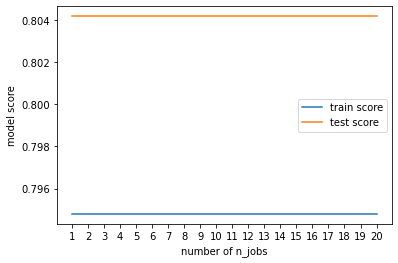

In [61]:
plt.plot(jobs, train_scores, label="train score")
plt.plot(jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of n_jobs")
plt.ylabel("model score")
plt.legend()
print(f"maximum lm score on test data:{max(test_scores)*100:.2f}%")

* observation: as the model is  overfitting, will not tune it 

## Randomforest classifier

In [62]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.9458333333333333

In [63]:
train_scores=[]
test_scores=[]
# create a list of different values for n_jobs
n_jobs= range(2,50)
# set up lm instance
rf= RandomForestClassifier()
# loop through different n_jobs
for i in jobs:
    rf.set_params(n_jobs=i)
    #fit algorithm
    rf.fit(x_train ,y_train)
    # update test scores list
    train_scores.append(rf.score(x_train,y_train))
    # update test scores
    test_scores.append(rf.score(x_test,y_test))

In [64]:
train_scores

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [65]:
test_scores

[0.95,
 0.9458333333333333,
 0.9416666666666667,
 0.9458333333333333,
 0.95,
 0.9458333333333333,
 0.9375,
 0.9416666666666667,
 0.95,
 0.9541666666666667,
 0.95,
 0.9416666666666667,
 0.9541666666666667,
 0.9458333333333333,
 0.9458333333333333,
 0.9416666666666667,
 0.9458333333333333,
 0.9458333333333333,
 0.9458333333333333,
 0.9541666666666667]

maximum rf score on test data:95.42%


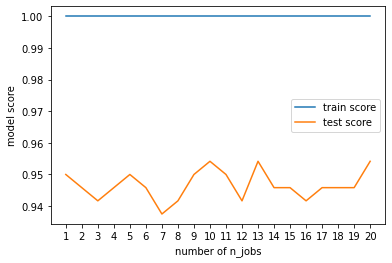

In [66]:
plt.plot(jobs, train_scores, label="train score")
plt.plot(jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of n_jobs")
plt.ylabel("model score")
plt.legend()
print(f"maximum rf score on test data:{max(test_scores)*100:.2f}%")

* observation: ads the model is overfitting, will drop it 

## sgd classifier

In [67]:
# sgd classifier
from sklearn.linear_model import SGDClassifier
np.random.seed(42)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)
sgd =SGDClassifier()
sgd.fit(x_train,y_train)
sgd.score(x_test,y_test)

0.8166666666666667

In [68]:
train_scores=[]
test_scores=[]
# create a list of different values for n_jobs
n_jobs= range(2,50)
# set up lm instance
sgd= SGDClassifier()
# loop through different n_jobs
for i in jobs:
    sgd.set_params(n_jobs=i)
    #fit algorithm
    sgd.fit(x_train ,y_train)
    # update test scores list
    train_scores.append(sgd.score(x_train,y_train))
    # update test scores
    test_scores.append(sgd.score(x_test,y_test))

In [69]:
train_scores

[0.7541666666666667,
 0.7375,
 0.35520833333333335,
 0.7822916666666667,
 0.7729166666666667,
 0.784375,
 0.7322916666666667,
 0.7697916666666667,
 0.7760416666666666,
 0.7958333333333333,
 0.7708333333333334,
 0.775,
 0.7614583333333333,
 0.553125,
 0.7302083333333333,
 0.7489583333333333,
 0.7625,
 0.734375,
 0.7677083333333333,
 0.74375]

In [70]:
test_scores

[0.8166666666666667,
 0.7916666666666666,
 0.31666666666666665,
 0.8333333333333334,
 0.8166666666666667,
 0.8166666666666667,
 0.7125,
 0.7916666666666666,
 0.8125,
 0.8208333333333333,
 0.8,
 0.8208333333333333,
 0.8291666666666667,
 0.5208333333333334,
 0.7875,
 0.8041666666666667,
 0.8,
 0.7958333333333333,
 0.8375,
 0.7875]

maximum sgd score on test data:83.75%


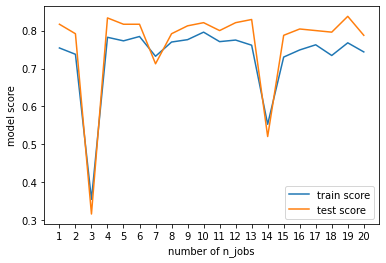

In [71]:
plt.plot(jobs, train_scores, label="train score")
plt.plot(jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of n_jobs")
plt.ylabel("model score")
plt.legend()
print(f"maximum sgd score on test data:{max(test_scores)*100:.2f}%")

In [72]:
# Predicting the model
y_predict_sgd= sgd.predict(x_test)

In [73]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_sgd))
print(classification_report(y_test,y_predict_sgd))

0.7875
              precision    recall  f1-score   support

           2       0.64      0.31      0.42        29
           3       0.80      0.98      0.88       184
           4       0.00      0.00      0.00        27

    accuracy                           0.79       240
   macro avg       0.48      0.43      0.43       240
weighted avg       0.69      0.79      0.72       240



In [74]:
from sklearn.metrics import confusion_matrix
y_preds=sgd.predict(x_test)
confusion_matrix(y_preds,y_test)

array([[  9,   4,   1],
       [ 20, 180,  26],
       [  0,   0,   0]], dtype=int64)

## kneighborscalssifier

In [75]:
# kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

0.7333333333333333

In [76]:
# tune kn
train_scores=[]
test_scores=[]
# create a list of different values for n_jobs
n_jobs= range(2,50)
# set up lm instance
kn= KNeighborsClassifier()
# loop through different n_jobs
for i in jobs:
    kn.set_params(n_jobs=i)
    #fit algorithm
    kn.fit(x_train ,y_train)
    # update test scores list
    train_scores.append(kn.score(x_train,y_train))
    # update test scores
    test_scores.append(kn.score(x_test,y_test))

In [77]:
train_scores

[0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775,
 0.775]

In [78]:
test_scores

[0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333]

maximum kn score on test data:73.33%


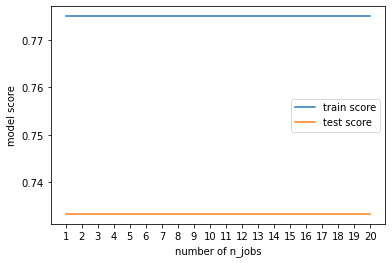

In [79]:
plt.plot(jobs, train_scores, label="train score")
plt.plot(jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of n_jobs")
plt.ylabel("model score")
plt.legend()
print(f"maximum kn score on test data:{max(test_scores)*100:.2f}%")

* observation: as the model is overfitting, drop it for further tuning of hyperparameters

## svc

In [80]:
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10)
np.random.seed(42)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.7666666666666667

In [81]:
# tune svc
train_scores=[]
test_scores=[]
# create a list of different values for n_jobs
kernel="rbf"
# set up lm instance
svc =SVC()
# loop through different n_jobs
for i in jobs:
    svc.set_params(kernel="rbf")
    #fit algorithm
    svc.fit(x_train ,y_train)
    # update test scores list
    train_scores.append(svc.score(x_train,y_train))
    # update test scores
    test_scores.append(svc.score(x_test,y_test))

In [82]:
train_scores

[0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875,
 0.71875]

In [83]:
test_scores

[0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667]

maximum svc score on test data:76.67%


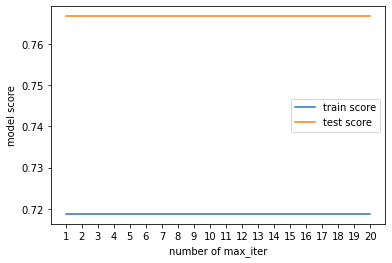

In [84]:
plt.plot(jobs, train_scores, label="train score")
plt.plot(jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of max_iter")
plt.ylabel("model score")
plt.legend()
print(f"maximum svc score on test data:{max(test_scores)*100:.2f}%")

* observation: as model is overfitting, will drop it

## bernoulli nb

In [85]:
from sklearn.naive_bayes import BernoulliNB
np.random.seed(42)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
nb = BernoulliNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)

0.7583333333333333

In [86]:
# tune mlp
train_scores=[]
test_scores=[]
# create a list of different values for n_jobs
alpha= 2
# set up lm instance
bernoulli= BernoulliNB()
# loop through different n_jobs
for i in jobs:
    bernoulli.set_params(alpha=2)
    #fit algorithm
    bernoulli.fit(x_train ,y_train)
    # update test scores list
    train_scores.append(bernoulli.score(x_train,y_train))
    # update test scores
    test_scores.append(bernoulli.score(x_test,y_test))

In [87]:
train_scores

[0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667,
 0.7104166666666667]

In [88]:
test_scores

[0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333,
 0.7583333333333333]

maximum bernoulli score on test data:75.83%


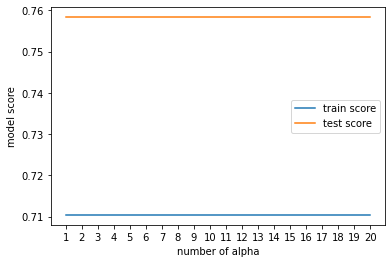

In [89]:
plt.plot(jobs, train_scores, label="train score")
plt.plot(jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of alpha")
plt.ylabel("model score")
plt.legend()
print(f"maximum bernoulli score on test data:{max(test_scores)*100:.2f}%")

* observation: as model is overfitting, will not continue it 

## mlp lcassifier

In [90]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(x_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [91]:
train_scores=[]
test_scores=[]
# create a list of different values for n_jobs
max_iter= range(2,200)
# set up lm instance
mlp= MLPClassifier()
# loop through different n_jobs
for i in jobs:
    mlp.set_params(max_iter=i)
    #fit algorithm
    mlp.fit(x_train ,y_train)
    # update test scores list
    train_scores.append(mlp.score(x_train,y_train))
    # update test scores
    test_scores.append(mlp.score(x_test,y_test))

In [92]:
train_scores

[0.6104166666666667,
 0.703125,
 0.6822916666666666,
 0.44583333333333336,
 0.5854166666666667,
 0.6541666666666667,
 0.690625,
 0.54375,
 0.6604166666666667,
 0.7,
 0.6708333333333333,
 0.71875,
 0.6614583333333334,
 0.728125,
 0.7,
 0.7,
 0.709375,
 0.7416666666666667,
 0.7364583333333333,
 0.7229166666666667]

In [93]:
test_scores

[0.6333333333333333,
 0.75,
 0.7583333333333333,
 0.4666666666666667,
 0.6416666666666667,
 0.7125,
 0.7125,
 0.5583333333333333,
 0.7083333333333334,
 0.7166666666666667,
 0.6791666666666667,
 0.7791666666666667,
 0.6791666666666667,
 0.7708333333333334,
 0.7541666666666667,
 0.7541666666666667,
 0.7625,
 0.7708333333333334,
 0.775,
 0.75]

maximum mlp score on test data:77.92%


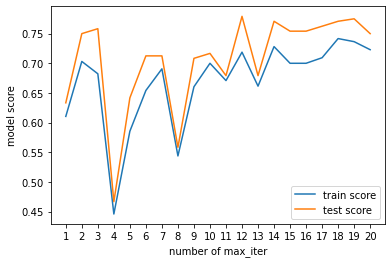

In [94]:
plt.plot(jobs, train_scores, label="train score")
plt.plot(jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of max_iter")
plt.ylabel("model score")
plt.legend()
print(f"maximum mlp score on test data:{max(test_scores)*100:.2f}%")

In [95]:
# Predicting the model
y_predict_mlp= mlp.predict(x_test)

In [96]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.75
              precision    recall  f1-score   support

           2       0.33      0.24      0.28        29
           3       0.82      0.90      0.86       184
           4       0.44      0.26      0.33        27

    accuracy                           0.75       240
   macro avg       0.53      0.47      0.49       240
weighted avg       0.72      0.75      0.73       240



## xgbclassifier

In [97]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [98]:
import xgboost as xgb

In [99]:
from xgboost import XGBClassifier
np.random.seed(42)
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)
model_xgb.score(x_test,y_test)

[18:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9416666666666667

In [100]:
# Predicting the model
y_predict_xgb = model_xgb.predict(x_test)

In [101]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.9416666666666667
              precision    recall  f1-score   support

           2       0.89      0.86      0.88        29
           3       0.94      0.98      0.96       184
           4       1.00      0.74      0.85        27

    accuracy                           0.94       240
   macro avg       0.95      0.86      0.90       240
weighted avg       0.94      0.94      0.94       240



In [102]:
from sklearn.metrics import roc_curve
model_xgb.fit(x_train,y_train)
# make predictions with probabilities
y_probs=clf.predict_proba(x_test)
y_probs[:10]

[18:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[2.61799037e-01, 4.08998328e-01, 3.29202634e-01],
       [6.31688121e-01, 2.92653054e-01, 7.56588252e-02],
       [2.71799811e-03, 9.64780161e-01, 3.25018410e-02],
       [6.71353290e-03, 9.38008210e-01, 5.52782571e-02],
       [6.73362124e-03, 9.23987991e-01, 6.92783881e-02],
       [2.28032405e-03, 9.04869803e-01, 9.28498729e-02],
       [4.39579115e-01, 5.28070230e-01, 3.23506550e-02],
       [5.83526472e-04, 9.86426190e-01, 1.29902833e-02],
       [5.14054639e-01, 4.58239754e-01, 2.77056063e-02],
       [5.92247182e-02, 1.67247051e-01, 7.73528231e-01]])

In [103]:
from sklearn.metrics import roc_auc_score

In [104]:
y_prob = model_xgb.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.980985 (macro),
0.976716 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.977976 (macro),
0.971521 (weighted by prevalence)


In [105]:
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [106]:
model_gridrf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [107]:
y_predict_rf = model_gridrf.predict(x_test)

In [108]:
from sklearn.metrics import roc_curve

# fit classifier
rf.fit(x_train,y_train)
# make predictions with probabilities
y_probs=rf.predict_proba(x_test)
y_probs[:10]

array([[0.16, 0.5 , 0.34],
       [0.68, 0.32, 0.  ],
       [0.  , 0.92, 0.08],
       [0.04, 0.95, 0.01],
       [0.  , 0.97, 0.03],
       [0.01, 0.94, 0.05],
       [0.27, 0.55, 0.18],
       [0.02, 0.95, 0.03],
       [0.76, 0.24, 0.  ],
       [0.03, 0.68, 0.29]])

In [109]:
y_prob = model_gridrf.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.911296 (macro),
0.909016 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.910827 (macro),
0.906683 (weighted by prevalence)


In [110]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.5 , 0.32, 0.92, 0.95, 0.97, 0.94, 0.55, 0.95, 0.24, 0.68])

## function to know accuracy of models

In [111]:
# combining scores of different models
models= {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "SGDClassifier": SGDClassifier(),
         "MLPClassifier": MLPClassifier(),
         "BernoulliNB":BernoulliNB(),
         "SVC":SVC(),
         "RandomForestClassifier": RandomForestClassifier(),
         "XGBClassifier":XGBClassifier()}
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [112]:
model_scores=fit_and_score(models=models,
                          x_train= x_train,
                          x_test =x_test,
                          y_train= y_train,
                          y_test= y_test)
model_scores

[18:16:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'Logistic Regression': 0.8041666666666667,
 'KNN': 0.7333333333333333,
 'SGDClassifier': 0.8,
 'MLPClassifier': 0.7916666666666666,
 'BernoulliNB': 0.7583333333333333,
 'SVC': 0.7666666666666667,
 'RandomForestClassifier': 0.95,
 'XGBClassifier': 0.9416666666666667}

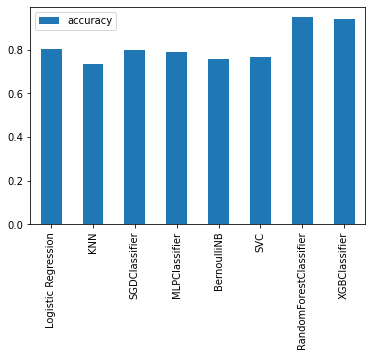

In [113]:
# compare model accuracy
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## feature importance

In [114]:
from sklearn.feature_selection import SelectKBest, chi2

In [115]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(x)
# Summarize selected features
print(features[0:5,:])

[5.170e+00 6.450e-02 1.519e-01 1.232e+00 4.679e+01 3.590e+01 1.011e+00
 1.865e+01 3.140e-01 1.107e+02 1.787e+01 2.221e-01 6.270e+00 1.083e-01
 1.208e+00 7.964e+00 2.971e+02 3.580e-01 4.159e+01 4.071e-01 3.877e+00
 1.336e+02 1.209e+02 2.380e+02 8.748e+01 2.186e+00]
[[12 10  7  0]
 [12  7  7  1]
 [21 18 13  1]
 [15 21  6 12]
 [14  2  2  2]]


In [116]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(x)
# Summarize selected features
print(features[0:5,:])

[5.170e+00 6.450e-02 1.519e-01 1.232e+00 4.679e+01 3.590e+01 1.011e+00
 1.865e+01 3.140e-01 1.107e+02 1.787e+01 2.221e-01 6.270e+00 1.083e-01
 1.208e+00 7.964e+00 2.971e+02 3.580e-01 4.159e+01 4.071e-01 3.877e+00
 1.336e+02 1.209e+02 2.380e+02 8.748e+01 2.186e+00]
[[12 10  7  0]
 [12  7  7  1]
 [21 18 13  1]
 [15 21  6 12]
 [14  2  2  2]]


In [117]:
from sklearn.feature_selection import RFE

In [118]:
xgb = XGBClassifier()
rfe = RFE(xgb)
fit = rfe.fit(x,y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

[18:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [119]:
df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

[18:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.049 0.046 0.055 0.05  0.05  0.046 0.05  0.046 0.055 0.045 0.05  0.055
 0.054 0.047 0.052 0.047 0.05  0.049 0.05  0.053]


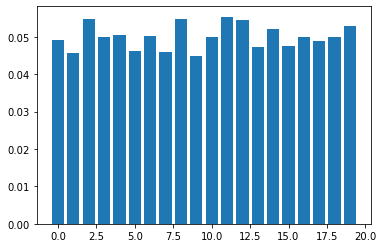

In [120]:
x = df.iloc[:, 0:20]
y = df.iloc[:,20]
# fit model no training data
model = XGBClassifier()
model.fit(x, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [121]:
df.head(2)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3


In [122]:
df  = pd.DataFrame(data = model.feature_importances_ ,columns=['feature_importnace'] ,index=['Age', 'Gender',
                                                                                             'EducationBackground',
                                                                                             'MaritalStatus',
                                                                                             'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
                                                                                             'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
                                                                                             'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
                                                                                             'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
                                                                                             'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
                                                                                             'TotalWorkExperienceInYears', 'TrainingTimesLastYear'])
df

,feature_importnace
Age,0.049273
Gender,0.045553
EducationBackground,0.054638
MaritalStatus,0.049878
EmpDepartment,0.050460
EmpJobRole,0.046281
BusinessTravelFrequency,0.050160
DistanceFromHome,0.046058
EmpEducationLevel,0.054650
EmpEnvironmentSatisfaction,0.044952


In [123]:
df.sort_values(by='feature_importnace', ascending=False)

,feature_importnace
EmpJobInvolvement,0.055366
EmpEducationLevel,0.054650
EducationBackground,0.054638
EmpJobLevel,0.054368
TrainingTimesLastYear,0.052844
NumCompaniesWorked,0.051989
EmpDepartment,0.050460
BusinessTravelFrequency,0.050160
EmpHourlyRate,0.050037
TotalWorkExperienceInYears,0.049976


In [124]:
import pickle
pickle.dump(clf,open("model_xgb.pkl","wb"))

In [125]:
loaded_model=pickle.load(open("model_xgb.pkl","rb"))
loaded_model.score(x_test,y_test)

0.8375

In [126]:
from joblib import dump,load
# save model to file
dump(model_xgb,filename="model_xgb.joblib")

['model_xgb.joblib']

In [127]:
# import saved joblib model
loaded_joblib_model=load(filename="model_xgb.joblib")

## observation: the feature importances which contributed more to modelling is "empjobinvolvement","empeducationlevel","educationbackground","empjoblevel","trainingtimes lastyear","numcompaniesworked"and "empdepartment" whereas the least 5 factors which contributed are as follows "empjobsatisfaction","empjobrole","distancefromhome","gender" and"empenvironmentsatisfaction

## observation:
* comapny can increase "empjoninvolvement" as it has effect on performance rating. 
* company should reduce overtime as it reduces performance rating

## project summary:
1. models used in project are., RandomForestClassifier, LogisticRegression, MLPClassifier, BernoulliNB, XGBClassifier, SVC, KNeighborsClassifier,SGDClassifier
2. the most import feature used in project is EmpDepartment
3. PCA has not been used in project as it decreased model performance. so dropped it and continued without pca
4. other techniques used in project are:
    * SMOTE analysis as the dataset is imbalanced . it gives correct accuracy and decreases model biasness
    * StandardScaler has been used to normalize data as few models works better with normalized data
    * LabelEnocer is used to turn categories into numbers
5. model used for further validation is XGBClassifier:
    * XGBClassifier showed an accuracy of 94% 
    * rocc_auc_score on xgbclassifier is One-vs-One ROC AUC scores:
        * 0.980985 (macro),
        * 0.976716 (weighted by prevalence)
        * One-vs-Rest ROC AUC scores:
        * 0.977976 (macro),
        * 0.971521 (weighted by prevalence)
    * model xgb performed well compared to other models
6. feature selection:
    * most of data visualization is done for department wise 
    * in correlation it is observed that empeducationlevel is highly correlated with performancerating before standardizing and smote
    * empnumber has been dropped from dataset
    * used chi2 measure to select feature importance
7. results,analysis and insights:
    * while doing correlation  empeducationlevel is highly correlated whereas during feature importance, it is observed that empjobinvolvement is contributing more to model training
    * smote is most important technique used as the dataset is imbalanced and it would have resulted in a complete worng accuracy and model bias
    * on the basis of analysis, business problem has been to reduce overtime 